In [1]:
import urllib.request

In [2]:
link = "https://www.bbc.com/news/world-asia-india-49615665"

In [3]:
req = urllib.request.Request(link)
response = urllib.request.urlopen(req)
the_page = response.read()

In [4]:
the_page

b'\n\n<!DOCTYPE html>\n<html lang="en" id="responsive-news">\n<head  prefix="og: http://ogp.me/ns#">\n    <meta name="viewport" content="width=device-width, initial-scale=1, user-scalable=1">\n    <meta charset="utf-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n    <title>Chandrayaan-2: Modi proud despite Moon landing setback - BBC News</title>\n    <meta name="description" content="Chandrayaan-2 was about to land near the Moon\'s south pole when contact with the craft was lost.">\n    <link rel="preload" as="style" href="https://static.bbc.co.uk/news/1.313.03583/stylesheets/services/news/compact.css" media="(max-width: 599px)">\n    <link rel="preload" as="style" href="https://static.bbc.co.uk/news/1.313.03583/stylesheets/services/news/tablet.css" media="(min-width: 600px) and (max-width: 1007px)">\n    <link rel="preload" as="style" href="https://static.bbc.co.uk/news/1.313.03583/stylesheets/services/news/wide.css" media="(min-width: 1008px)">\n\n          

In [5]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(the_page, 'lxml')

In [6]:
corpus = soup.find_all("p")

In [7]:
corpus = [x.text for x in corpus]

In [8]:
len(corpus)

37

In [9]:
corpus = corpus[12:-2]
corpus

["Indian Prime Minister Narendra Modi told his country's space scientists he was proud of a programme that had come so near to putting a probe on the Moon. ",
 'Contact with Chandrayaan-2 was lost moments before its Vikram module was due to touch down at the lunar south pole.',
 'The fate of the craft is not yet known, but Mr Modi said there would be further opportunities.',
 'India would have been the fourth nation to make a soft landing on the Moon.',
 '"The best is yet to come in our space programme. India is with you," said Mr Modi.',
 'The Chandrayaan-2 approached the Moon as normal until an error occurred about 2.1km (1.3 miles) from the surface, officials said.',
 "India's Space Research Organization (Isro) said it lost contact seconds before the ship was expected to land.",
 "The country's first Moon mission - Chandrayaan-1, in 2008 - carried out the first and most detailed search for water on the lunar surface using radars.",
 "Chandrayaan-2 entered the Moon's orbit on 20 Augu

In [10]:
import nltk
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import nltk
from nltk.corpus import stopwords
from string import punctuation



In [11]:
nltk.download('stopwords')
nltk.download('punkt')
stop_words = stopwords.words('english')
from string import punctuation
custom = stop_words+list(punctuation)
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saura\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saura\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\saura\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [12]:
def my_tokenizer(s):
   s = s.lower()
   tokens = nltk.tokenize.word_tokenize(s)
   tokens = [t for t in tokens if len(t)>2] #remove words lesser than 2 in length
   tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens] #lemmatize words
   tokens = [t for t in tokens if t not in custom] #remove stopwords and punctuation
   tokens = [t for t in tokens if not any(c.isdigit() for c in t)] # remove digits
   return tokens

In [13]:
corpus=[my_tokenizer(x) for x in corpus]

In [14]:
corpus

[['indian',
  'prime',
  'minister',
  'narendra',
  'modi',
  'told',
  'country',
  'space',
  'scientist',
  'wa',
  'proud',
  'programme',
  'come',
  'near',
  'putting',
  'probe',
  'moon'],
 ['contact',
  'wa',
  'lost',
  'moment',
  'vikram',
  'module',
  'wa',
  'due',
  'touch',
  'lunar',
  'south',
  'pole'],
 ['fate', 'craft', 'yet', 'known', 'modi', 'said', 'would', 'opportunity'],
 ['india', 'would', 'fourth', 'nation', 'make', 'soft', 'landing', 'moon'],
 ['best', 'yet', 'come', 'space', 'programme', 'india', 'said', 'modi'],
 ['approached',
  'moon',
  'normal',
  'error',
  'occurred',
  'mile',
  'surface',
  'official',
  'said'],
 ['india',
  'space',
  'research',
  'organization',
  'isro',
  'said',
  'lost',
  'contact',
  'second',
  'ship',
  'wa',
  'expected',
  'land'],
 ['country',
  'first',
  'moon',
  'mission',
  'carried',
  'first',
  'detailed',
  'search',
  'water',
  'lunar',
  'surface',
  'using',
  'radar'],
 ['entered',
  'moon',
  'orbi

In [15]:
corpus1=corpus

In [16]:
flat_corpus=[item for sublist in corpus1 for item in sublist]

In [17]:
flat_corpus

['indian',
 'prime',
 'minister',
 'narendra',
 'modi',
 'told',
 'country',
 'space',
 'scientist',
 'wa',
 'proud',
 'programme',
 'come',
 'near',
 'putting',
 'probe',
 'moon',
 'contact',
 'wa',
 'lost',
 'moment',
 'vikram',
 'module',
 'wa',
 'due',
 'touch',
 'lunar',
 'south',
 'pole',
 'fate',
 'craft',
 'yet',
 'known',
 'modi',
 'said',
 'would',
 'opportunity',
 'india',
 'would',
 'fourth',
 'nation',
 'make',
 'soft',
 'landing',
 'moon',
 'best',
 'yet',
 'come',
 'space',
 'programme',
 'india',
 'said',
 'modi',
 'approached',
 'moon',
 'normal',
 'error',
 'occurred',
 'mile',
 'surface',
 'official',
 'said',
 'india',
 'space',
 'research',
 'organization',
 'isro',
 'said',
 'lost',
 'contact',
 'second',
 'ship',
 'wa',
 'expected',
 'land',
 'country',
 'first',
 'moon',
 'mission',
 'carried',
 'first',
 'detailed',
 'search',
 'water',
 'lunar',
 'surface',
 'using',
 'radar',
 'entered',
 'moon',
 'orbit',
 'august',
 'wa',
 'due',
 'make',
 'controlled',
 'd

In [18]:
!pip install wordcloud

In [19]:
from collections import Counter
d=Counter(flat_corpus)

In [20]:
d

Counter({'indian': 3,
         'prime': 2,
         'minister': 2,
         'narendra': 1,
         'modi': 4,
         'told': 1,
         'country': 4,
         'space': 8,
         'scientist': 1,
         'wa': 9,
         'proud': 1,
         'programme': 2,
         'come': 2,
         'near': 1,
         'putting': 1,
         'probe': 1,
         'moon': 7,
         'contact': 2,
         'lost': 2,
         'moment': 1,
         'vikram': 2,
         'module': 1,
         'due': 2,
         'touch': 1,
         'lunar': 4,
         'south': 1,
         'pole': 1,
         'fate': 1,
         'craft': 1,
         'yet': 2,
         'known': 1,
         'said': 5,
         'would': 7,
         'opportunity': 1,
         'india': 7,
         'fourth': 1,
         'nation': 1,
         'make': 2,
         'soft': 2,
         'landing': 2,
         'best': 1,
         'approached': 1,
         'normal': 2,
         'error': 1,
         'occurred': 1,
         'mile': 1,
         's

In [21]:
d=dict(d)

In [22]:
d=sorted(d.items(), key = lambda kv:(kv[1], kv[0]),reverse=True)

In [23]:
d=dict(d)

In [24]:
d.keys()

dict_keys(['wa', 'mission', 'isro', 'space', 'would', 'moon', 'india', 'surface', 'said', 'first', 'descent', 'modi', 'lunar', 'country', 'time', 'sivan', 'indian', 'also', 'yet', 'water', 'vikram', 'staff', 'soft', 'ship', 'screen', 'rover', 'programme', 'prime', 'official', 'normal', 'minister', 'mar', 'make', 'made', 'lost', 'landing', 'lander', 'land', 'july', 'ha', 'due', 'director', 'data', 'control', 'contact', 'come', 'carried', 'budget', 'writes', 'writer', 'woman', 'within', 'wisdom', 'way', 'watching', 'vehicle', 'vanitha', 'using', 'two', 'travel', 'towards', 'touch', 'took', 'told', 'thrift', 'three', 'thing', 'terror', 'tenth', 'technological', 'strict', 'span', 'spacecraft', 'south', 'soil', 'social', 'so-called', 'sent', 'sending', 'second', 'searching', 'search', 'scientist', 'science', 'saturday', 'satellite', 'sanskrit', 'rough', 'room', 'ritu', 'research', 'radar', 'putting', 'proud', 'project', 'probe', 'pride', 'pragyan', 'possibility', 'pole', 'planetary', 'phase

In [25]:
text=''
for key in d.keys():
    text=text+key+' '

In [26]:
text

"wa mission isro space would moon india surface said first descent modi lunar country time sivan indian also yet water vikram staff soft ship screen rover programme prime official normal minister mar make made lost landing lander land july ha due director data control contact come carried budget writes writer woman within wisdom way watching vehicle vanitha using two travel towards touch took told thrift three thing terror tenth technological strict span spacecraft south soil social so-called sent sending second searching search scientist science saturday satellite sanskrit rough room ritu research radar putting proud project probe pride pragyan possibility pole planetary phase paved pallava organization orbiter orbit opportunity opened one occurred near national nation narendra named n't muthaya moonquakes month moment module minute mineral mile medium measuring maven matter live lift-off life led launch known karidhal kailasavadivoo journey interplanetary instrument instance initial 

In [27]:
from wordcloud import WordCloud

In [28]:
wordcloud = WordCloud(width = 800, height = 800, min_font_size = 10).generate(text)

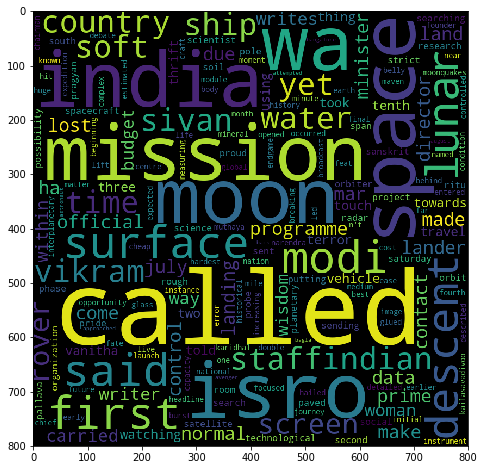

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 

In [30]:
#The Output shows about the main topic that news article is talking about